In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [7]:
mnist = fetch_openml('mnist_784',version=1)
X, y = mnist['data'], mnist['target']
y = y.astype(np.int)
print('x_shape:',X.shape)
print('y_shape:',y.shape)

x_shape: (70000, 784)
y_shape: (70000,)


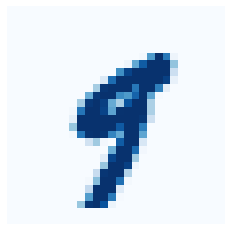

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.Blues, interpolation='nearest')
    plt.axis('off')
some_digit = X[36000]
plot_digit(some_digit)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
x_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

9
[False]


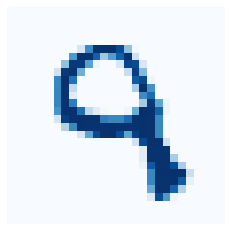

In [17]:
# 확률적 경사하강법 (SGD:Stochastic Gradient Descent) - Linear 모델 중 하나
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, random_state=42) # 1000번 훈련 할 때마다 
sgd_clf.fit(X_train, y_train_5)
some_digit = X[64000]
plot_digit(some_digit)
print(y[64000])
print(sgd_clf.predict([some_digit]))

In [19]:
# 교차검증
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy"))

[0.86815 0.7014  0.8665 ]


In [21]:
# 오차행렬
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(y_train_pred)

[False False False ...  True  True False]


In [26]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_train_5, y_train_pred)
print(result)

[[48101  6478]
 [ 4801   620]]


In [27]:
y_train_perfect_predictions = y_train_5
result = confusion_matrix(y_train_5, y_train_perfect_predictions)
print(result)

[[54579     0]
 [    0  5421]]


 - 정밀도(precision) : 양성 예측의 정확도, 전체 양성의 수와 진짜 양성의 수 비율
 - 재현율(recall) : 분류기가 정확하게 감지한 양성 샘플의 비율

In [29]:
from sklearn.metrics import precision_score, recall_score

m_precision_score = precision_score(y_train_5, y_train_pred)
print(m_precision_score)
m_recall_score = recall_score(y_train_5, y_train_pred)
print(m_recall_score)

0.08734854888701042
0.11437004242759638


 - 정밀도와 재현율은 서로 트레이드 오프 관계